In [1]:
from data_processing import resize_imgs, load_test_data, rl_encode, add_dim, \
    RESIZE_HEIGHT, RESIZE_WIDTH, IMG_HEIGHT, IMG_WIDTH
from keras.models import model_from_json
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
X_test_raw, tags = load_test_data()

In [3]:
X_test = add_dim(resize_imgs(X_test_raw , RESIZE_HEIGHT, RESIZE_WIDTH)) / 128 - 1

/home/alex/.virtualenvs/ds3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/alex/.virtualenvs/ds3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [4]:
with open('models/unet.json', 'r') as file:
    model_json = file.read()
model = model_from_json(model_json)
model.load_weights('models/weights.h5')

In [5]:
y_pred = model.predict(X_test)

In [6]:
del X_test_raw, X_test

In [7]:
pix_array = (resize_imgs(y_pred[..., 0] * 255, 
                         IMG_HEIGHT, IMG_WIDTH) > 128).astype(int)

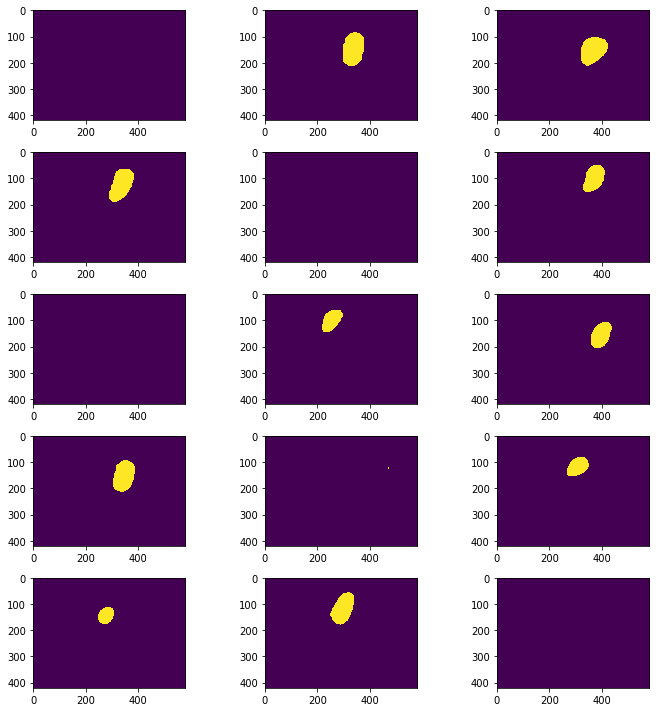

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))
axes_list = [ax for ax_list in axes for ax in ax_list]
for idx, axis in zip(range(len(axes_list)), axes_list):
    axis.imshow(pix_array[1339+idx])
plt.tight_layout()

In [9]:
with open('submission.csv', 'w') as sub_file:
    sub_file.write('img,pixels\n')
    for tag, img in zip(tags, pix_array):
        rl_enc = rl_encode(img)
        sub_file.write('{},{}\n'.format(tag, rl_enc))